In [2]:
from mindspore import load_checkpoint, Model, load_param_into_net
from nets.googlenet import GoogLeNet
from nets.inceptionv3 import InceptionV3_backbone
from utils.model_utils import extract_features
from utils.dataset_utils import create_dataset, gen_dataset
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
device_target = context.get_context('device_target')
context.set_context(mode=context.GRAPH_MODE, device_target=device_target)

## 提取特征

In [9]:
# batch_size = 128
# # mode = "train"
# mode = "train"
# eval_set = create_dataset(f"./dataset/{mode}.list", 299, train=False, batch_size=batch_size, shuffle=False)
# # googlenet_backbone = GoogLeNet_backbone()
# inceptionv3_backbone = InceptionV3_backbone()
# load_checkpoint("./checkpoints/model_InceptionV3_best_param_backbone.ckpt", inceptionv3_backbone)
# extract_features(inceptionv3_backbone, eval_set, "InceptionV3", f"./checkpoints/features/{mode}", batch_size)

## 正确率

In [4]:
net = GoogLeNet()
load_checkpoint("./checkpoints/model_GoogLeNet_best_param.ckpt", net)

model = Model(net)

test_list_path = "./dataset/test.list"
dataset = create_dataset(test_list_path, 224, train=False, batch_size=1, shuffle=False)

wrong_idx = []
y_true = []
y_pred = []
for i, data in enumerate(dataset.create_dict_iterator()):
    image = data['image']
    label = data['label']
    y_true.append(label.asnumpy())
    output = model.predict(image)
    predict = np.argmax(output.asnumpy(), axis=1)[0]
    y_pred.append(predict)
    if predict != label.asnumpy():
        wrong_idx.append(i)

In [5]:
accuracy_score(y_pred, y_true)

0.9486

## 混淆矩阵

In [6]:
confusion_matrix(y_pred, y_true, labels=[0, 1])

array([[2333,   90],
       [ 167, 2410]])

## 错误分类

In [7]:
f = open(test_list_path, 'r')
images_path = [x.strip() for x in f.readlines()]
f.close()

In [8]:
images_path[:5]

['./dataset/train/dog.3022.jpg',
 './dataset/train/dog.9984.jpg',
 './dataset/train/dog.7350.jpg',
 './dataset/train/cat.1518.jpg',
 './dataset/train/cat.6585.jpg']

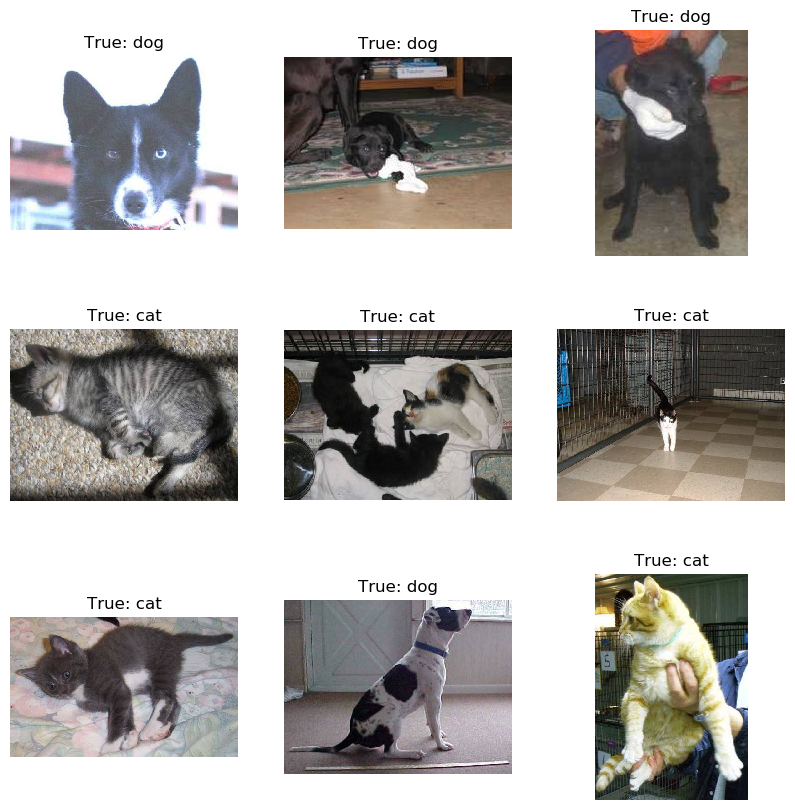

In [10]:

plt.figure(figsize=(10, 10))

for i in range(9):

    plt.subplot(3, 3, i + 1)
    idx = random.choice(wrong_idx)

    plt.imshow(Image.open(images_path[idx]))
    true = images_path[idx].split(".")[0][-3:]
    plt.axis('off')
    plt.title('True: %s' % (true))

plt.show()

In [13]:
wrong_names = []
for i in wrong_idx:
    wrong_names.append(images_path[i].split(".")[0][-3:])

In [14]:
pd.Series(wrong_names).value_counts()

cat    167
dog     90
dtype: int64

In [ ]:
# 1. 预训练模型
# 3. 动态学习率
# 2. 数据增强
# 4. 标签平滑
# 5. 样本权重

## 优化后

0.9906


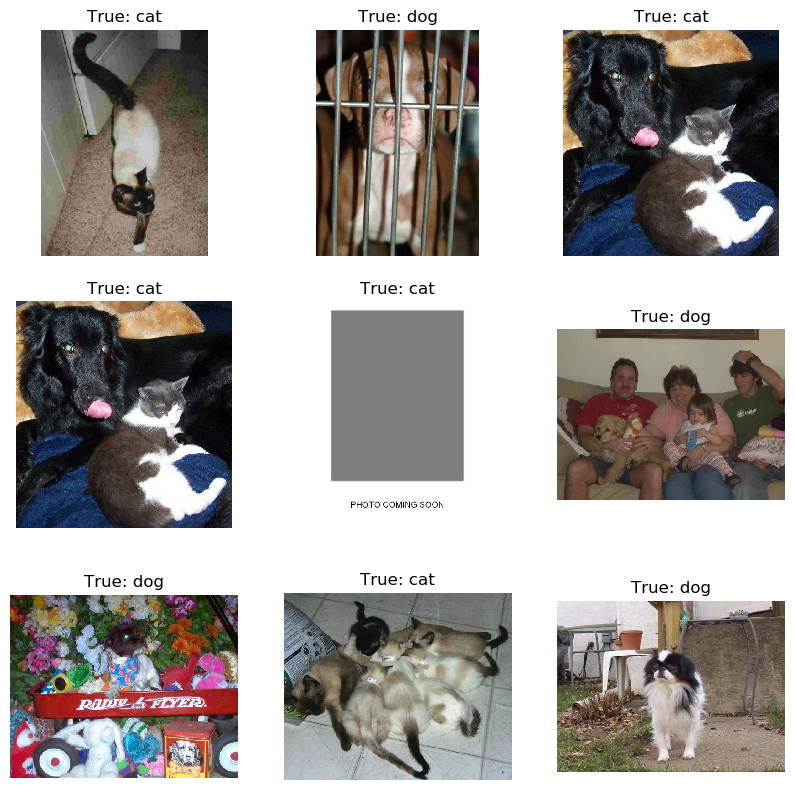

cat    31
dog    16
dtype: int64

In [17]:

load_checkpoint("./checkpoints/model_GoogLeNet_imp_best_param.ckpt", net)

wrong_idx = []
y_true = []
y_pred = []
for i, data in enumerate(dataset.create_dict_iterator()):
    image = data['image']
    label = data['label']
    y_true.append(label.asnumpy())
    output = model.predict(image)
    predict = np.argmax(output.asnumpy(), axis=1)[0]
    y_pred.append(predict)
    if predict != label.asnumpy():
        wrong_idx.append(i)

print(accuracy_score(y_pred, y_true))


plt.figure(figsize=(10, 10))

for i in range(9):

    plt.subplot(3, 3, i + 1)
    idx = random.choice(wrong_idx)

    plt.imshow(Image.open(images_path[idx]))
    true = images_path[idx].split(".")[1][-3:]
    plt.axis('off')
    plt.title('True: %s' % (true))

# plt.savefig("wrong_imp.png", dpi=300)
plt.show()

wrong_names = []
for i in wrong_idx:
    wrong_names.append(images_path[i].split(".")[1][-3:])

pd.Series(wrong_names).value_counts()